In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('airbnb-listings.csv', sep=";")

C:\Users\alfar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (40,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,202187,https://www.airbnb.com/rooms/202187,20170306202425,2017-03-07,South Congress Studio Apartment,NaN,Our apartment is perfect for the budget travel...,Our apartment is perfect for the budget travel...,none,Our neighborhood is very quiet but still withi...,...,10.0,10.0,10.0,NaN,NaN,strict,2,6.44,"30.2477609704,-97.7452720928","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17097070,https://www.airbnb.com/rooms/17097070,20170306202425,2017-03-07,Downtown House,My place is walking distance to Lake and Downt...,NaN,My place is walking distance to Lake and Downt...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"30.2546189861,-97.7534751233","Host Has Profile Pic,Is Location Exact"
2,3294079,https://www.airbnb.com/rooms/3294079,20170306202425,2017-03-07,Cute & Funky SoCo Kasbah,This little space is a cool oasis from the bus...,This cute & comfortable little studio has its ...,This little space is a cool oasis from the bus...,none,Travis Heights is a great neighborhood at the ...,...,10.0,10.0,10.0,NaN,NaN,strict,1,0.24,"30.239962496,-97.7503075417","Host Has Profile Pic,Is Location Exact"
3,17387404,https://www.airbnb.com/rooms/17387404,20170306202425,2017-03-07,Castle Cottage - Heart of SoCo,The Castle Cottage is now available for short-...,The Castle Cottage is tucked away under a cano...,The Castle Cottage is now available for short-...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,1,NaN,"30.2444434619,-97.749264457","Host Has Profile Pic,Host Identity Verified,Is..."
4,5630122,https://www.airbnb.com/rooms/5630122,20170306202425,2017-03-07,A skip to everything SXSW 2015!,This simple yet charming 1 berm apartment is a...,NaN,This simple yet charming 1 berm apartment is a...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"30.2443070738,-97.7529958439","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
df1 = df.filter(['Zipcode', 'Property Type', 'Square Feet', 'Bedrooms', 'Bathrooms',
                  'Review Scores Rating', 'Accommodates', 'Amenities', 'Cleaning Fee', 'Cancellation Policy'], axis=1)

In [5]:
df1.head()

,Zipcode,Property Type,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Amenities,Cleaning Fee,Cancellation Policy
0,78704,Apartment,500.0,1.0,1.0,97.0,2.0,"TV,Cable TV,Wireless Internet,Air conditioning...",25.0,strict
1,78704,House,NaN,2.0,1.0,NaN,4.0,"Internet,Wireless Internet,Air conditioning,Ki...",NaN,flexible
2,78704,House,NaN,1.0,1.0,100.0,2.0,"Wireless Internet,Air conditioning,Free parkin...",75.0,strict
3,78704,Guesthouse,NaN,1.0,1.0,NaN,2.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,strict
4,78704,Apartment,NaN,1.0,1.0,NaN,2.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,flexible


In [6]:
df1 = df1.dropna()
df1.head()

,Zipcode,Property Type,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Amenities,Cleaning Fee,Cancellation Policy
0,78704,Apartment,500.0,1.0,1.0,97.0,2.0,"TV,Cable TV,Wireless Internet,Air conditioning...",25.0,strict
22,78746,House,2800.0,4.0,2.5,99.0,8.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",300.0,strict
108,78741,House,1600.0,1.0,1.5,100.0,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",100.0,moderate
109,78722,House,900.0,1.0,1.0,80.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",50.0,strict
122,78702,House,2700.0,3.0,2.0,97.0,8.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",100.0,strict


In [7]:
def new_column(s1, df):
    lst = []
    for s in df['Amenities']:
        if s1 in s:
            lst.append('1')
        else:
            lst.append('0')
    return lst
    
def prop_type(df):
    lst = []
    for s in df['Property Type']:
        if 'Apartment' or 'Condominium' or 'Loft' in s:
            lst.append('1')
        elif 'House' or 'Townhouse' in s:
            lst.append('0')
        else:
            lst.append('')
    return lst

def cancel_policy(df):
    lst = []
    for s in df['Cancellation Policy']:
        if 'strict' in s:
            lst.append('2')
        elif 'moderate' in s:
            lst.append('0')
        elif 'flexible' in s:
            lst.append('0')
        else:
            lst.append('2')
    return lst
    

In [8]:
l1 = new_column('Free parking', df1)
df1['Free Parking'] = l1
df1['Free Parking'].head()

0      1
22     1
108    1
109    1
122    0
Name: Free Parking, dtype: object

In [9]:
df1['Amenities']

0         TV,Cable TV,Wireless Internet,Air conditioning...
22        TV,Cable TV,Internet,Wireless Internet,Air con...
108       TV,Cable TV,Internet,Wireless Internet,Air con...
109       TV,Internet,Wireless Internet,Air conditioning...
122       TV,Cable TV,Internet,Wireless Internet,Air con...
                                ...                        
120258    TV,Cable TV,Internet,Wireless Internet,Air con...
120281    TV,Cable TV,Internet,Wireless Internet,Air con...
120466    TV,Cable TV,Internet,Wireless Internet,Air con...
120500    TV,Internet,Wireless Internet,Air conditioning...
120781    TV,Internet,Wireless Internet,Air conditioning...
Name: Amenities, Length: 1346, dtype: object

In [10]:
l2 = new_column('Wireless Internet', df1)
df1['Wireless Internet'] = l2
l3 = new_column('Cable TV', df1)
df1['Cable TV'] = l3
l4 = prop_type(df1)
df1['Prop_encoded'] = l4
l5 = cancel_policy(df1)
df1['cancel_encoded'] = l5
df1.head()


,Zipcode,Property Type,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Amenities,Cleaning Fee,Cancellation Policy,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded
0,78704,Apartment,500.0,1.0,1.0,97.0,2.0,"TV,Cable TV,Wireless Internet,Air conditioning...",25.0,strict,1,1,1,1,2
22,78746,House,2800.0,4.0,2.5,99.0,8.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",300.0,strict,1,1,1,1,2
108,78741,House,1600.0,1.0,1.5,100.0,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",100.0,moderate,1,1,1,1,0
109,78722,House,900.0,1.0,1.0,80.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",50.0,strict,1,1,0,1,2
122,78702,House,2700.0,3.0,2.0,97.0,8.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",100.0,strict,0,1,1,1,2


In [11]:
df1['Price'] = df['Price']

In [12]:
df2 = df1.drop(['Property Type', 'Cancellation Policy', 'Amenities'], axis=1)
df2.head()

,Zipcode,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Cleaning Fee,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
0,78704,500.0,1.0,1.0,97.0,2.0,25.0,1,1,1,1,2,85.0
22,78746,2800.0,4.0,2.5,99.0,8.0,300.0,1,1,1,1,2,499.0
108,78741,1600.0,1.0,1.5,100.0,4.0,100.0,1,1,1,1,0,450.0
109,78722,900.0,1.0,1.0,80.0,2.0,50.0,1,1,0,1,2,150.0
122,78702,2700.0,3.0,2.0,97.0,8.0,100.0,0,1,1,1,2,275.0


In [13]:
df1['Zipcode'] = df1['Zipcode'].str.replace('-', '')
df1['Zipcode'] = df1['Zipcode'].str.replace(' ', '')
df1.head()

,Zipcode,Property Type,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Amenities,Cleaning Fee,Cancellation Policy,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
0,78704,Apartment,500.0,1.0,1.0,97.0,2.0,"TV,Cable TV,Wireless Internet,Air conditioning...",25.0,strict,1,1,1,1,2,85.0
22,78746,House,2800.0,4.0,2.5,99.0,8.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",300.0,strict,1,1,1,1,2,499.0
108,78741,House,1600.0,1.0,1.5,100.0,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",100.0,moderate,1,1,1,1,0,450.0
109,78722,House,900.0,1.0,1.0,80.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",50.0,strict,1,1,0,1,2,150.0
122,78702,House,2700.0,3.0,2.0,97.0,8.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",100.0,strict,0,1,1,1,2,275.0


In [14]:
df2 = df1.drop(['Property Type', 'Cancellation Policy', 'Amenities'], axis=1)
df2.head()

,Zipcode,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Cleaning Fee,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
0,78704,500.0,1.0,1.0,97.0,2.0,25.0,1,1,1,1,2,85.0
22,78746,2800.0,4.0,2.5,99.0,8.0,300.0,1,1,1,1,2,499.0
108,78741,1600.0,1.0,1.5,100.0,4.0,100.0,1,1,1,1,0,450.0
109,78722,900.0,1.0,1.0,80.0,2.0,50.0,1,1,0,1,2,150.0
122,78702,2700.0,3.0,2.0,97.0,8.0,100.0,0,1,1,1,2,275.0


In [15]:
df2 = df2.applymap(float)
df2.head()

,Zipcode,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Cleaning Fee,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
0,78704.0,500.0,1.0,1.0,97.0,2.0,25.0,1.0,1.0,1.0,1.0,2.0,85.0
22,78746.0,2800.0,4.0,2.5,99.0,8.0,300.0,1.0,1.0,1.0,1.0,2.0,499.0
108,78741.0,1600.0,1.0,1.5,100.0,4.0,100.0,1.0,1.0,1.0,1.0,0.0,450.0
109,78722.0,900.0,1.0,1.0,80.0,2.0,50.0,1.0,1.0,0.0,1.0,2.0,150.0
122,78702.0,2700.0,3.0,2.0,97.0,8.0,100.0,0.0,1.0,1.0,1.0,2.0,275.0


In [16]:
df1['Property Type'].value_counts()

Apartment          629
House              586
Loft                35
Condominium         31
Townhouse           15
Other               12
Cabin                9
Bungalow             9
Guesthouse           6
Villa                4
Bed & Breakfast      3
Guest suite          2
Camper/RV            2
Chalet               1
Boat                 1
Yurt                 1
Name: Property Type, dtype: int64

In [17]:
df1['Cancellation Policy'].value_counts()

strict             854
moderate           391
flexible            92
super_strict_30      8
super_strict_60      1
Name: Cancellation Policy, dtype: int64

In [18]:
df2 = df2.dropna()

In [19]:
dataset = df2.values

In [20]:
dataset

array([[7.8704e+04, 5.0000e+02, 1.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        8.5000e+01],
       [7.8746e+04, 2.8000e+03, 4.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        4.9900e+02],
       [7.8741e+04, 1.6000e+03, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        4.5000e+02],
       ...,
       [7.8701e+04, 1.0940e+03, 2.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        8.9900e+02],
       [7.8722e+04, 6.0000e+02, 1.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        7.9000e+01],
       [7.8704e+04, 1.5320e+03, 2.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        2.6000e+02]])

In [21]:
X = dataset[:,0:12]

In [22]:
y = dataset[:,12]

In [23]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [24]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(729, 12) (243, 12) (729, 1) (243, 1)


In [27]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:


model = Sequential()
model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [30]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
12/12 [==============================] - 0s 22ms/step - loss: 0.0430 - mse: 0.0430 - mae: 0.1408 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1148
Epoch 2/150
12/12 [==============================] - 0s 5ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0977 - val_loss: 0.0222 - val_mse: 0.0222 - val_mae: 0.1043
Epoch 3/150
12/12 [==============================] - 0s 5ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1093 - val_loss: 0.0214 - val_mse: 0.0214 - val_mae: 0.1121
Epoch 4/150
12/12 [==============================] - 0s 5ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1040 - val_loss: 0.0207 - val_mse: 0.0207 - val_mae: 0.1004
Epoch 5/150
12/12 [==============================] - 0s 5ms/step - loss: 0.0187 - mse: 0.0187 - mae: 0.0951 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.0955
Epoch 6/150
12/12 [==============================] - 0s 5ms/step - loss: 0.0174 - mse: 0.0174 - mae: 0.0910 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.0924
Epoch 7/150
12/12 [==

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


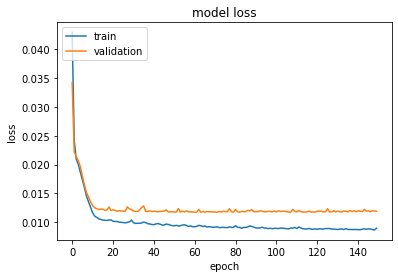

In [31]:
import matplotlib.pyplot as plt
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
Xnew = np.array([[10453.0, 4000.0, 6, 2, 70, 1, 0, 1, 1, 1, 1, 1]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[1.0453e+04 4.0000e+03 6.0000e+00 2.0000e+00 7.0000e+01 1.0000e+00
 0.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00], Predicted=[81.489876]


In [46]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 998us/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0716


[0.011733840219676495, 0.011733840219676495, 0.0716463252902031]

In [146]:
model.save("my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model\assets


In [170]:
df2.to_csv('airbnb_small.csv')